In [1]:
import pandas as pd
import numpy as np
import math
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [12]:
df = pd.read_csv('AMI_GSE66360_series_matrix.csv', skiprows=59)
df = df.T
df.columns = df.iloc[0]
df.drop('Class', inplace=True)
df['class'] = df.index
df['class'] = df['class'].apply(lambda x: x[0])
df.set_index('ID_REF', inplace=True)
df

/Users/mymac/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Class,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,class
ID_REF,,,,,,,,,,,,,,,,,,,,,
GSM1620819,5.866377893,8.22579012,6.17973231,6.179477974,2.792047952,9.290410779,6.998285145,5.348943925,10.742427,7.270560667,...,13.266235,14.57123,14.276568,4.504659,3.139334,2.747015,2.651554,3.413429,3.140612,H
GSM1620820,4.948736331,7.525865369,6.628137025,6.58288903,2.69571445,9.462275035,6.558214949,5.410884095,9.865655308,4.810194735,...,13.517013,14.738834,14.341233,4.409226,3.039961,2.638606,2.643615,3.399063,3.132691,H
GSM1620821,5.148384393,7.764636529,5.859151477,6.602134766,2.580181122,9.116776316,6.851622539,5.254073031,10.148454,7.822844272,...,13.416583,14.627181,14.318568,4.310076,3.220109,2.495261,2.626028,3.53997,3.698396,H
GSM1620822,5.064418945,7.198461482,5.974135101,6.545904723,2.712123845,9.134584186,7.357827486,5.242139865,10.87991277,5.690417407,...,13.494827,14.754124,14.363297,4.439311,3.263782,2.544199,2.504958,3.396225,3.638612,H
GSM1620823,5.017832878,7.831450258,6.793079158,5.911542321,2.723686912,9.582343511,7.283872601,5.219483996,10.09052505,7.089369391,...,13.330192,14.548389,14.263677,4.562883,3.138524,2.50663,2.609707,3.43472,3.577649,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1620913,6.472517225,8.261421952,6.367759272,6.440978114,3.73013912,7.355729877,6.206879166,6.217929861,5.375997385,6.133231971,...,5.942308,7.290514,8.988511,5.567947,5.55878,5.429437,4.48794,4.254286,5.375811,M
GSM1620914,5.678815851,6.925752665,6.835755831,6.955883278,2.914867562,7.944294937,6.638364166,5.992343792,9.613538724,3.89680742,...,14.163706,14.884506,14.792506,4.902195,3.416999,2.834741,2.782356,3.88208,3.744138,M
GSM1620915,5.653286378,7.918424183,7.577034915,6.499215058,3.013901455,8.563122679,7.379567509,5.766028609,9.312493837,5.545193595,...,13.682425,14.884506,14.783801,5.239906,3.699181,3.249683,3.056727,3.649827,4.021536,M



### a. High level description of the data and some pre-processing

1) How many genes profiled?

In [13]:
num_genes = df.shape[1] - 1
print(f'There are {num_genes} genes were profiled.')

There are 54675 genes were profiled.


2) How many samples (subjects/patients) in total?

In [15]:
num_samples = df.shape[0]
print(f'There were {num_samples} subjects in the study.')

There were 99 subjects in the study.


3) How many samples in each class?

In [17]:
num_of_class_h = len(df[df['class'] == 'H'])
print(f'There are {num_of_class_h} healthy samples (class = H). The rest ({num_samples - num_of_class_h}) have Myocardial Infraction.')

There are 50 healthy samples (class = H). The rest (49) have Myocardial Infraction.


4) If there are missing values, then remove the entire row (gene) from the data matrix. How many rows left now?

In [20]:
df.dropna(axis=1, inplace=True)
print(f"There were {num_genes-df.shape[1] -1} genes with missing values. After dropping, we're left with {df.shape[1] -1} genes.")
num_genes = df.shape[1] -1

There were 45 genes with missing values. After dropping, we're left with 54628 genes.


5) Pick 20 genes at random. Draw 20 pair boxplots in one figure comparing expression levels of each of these genes in the two classes M and H.

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

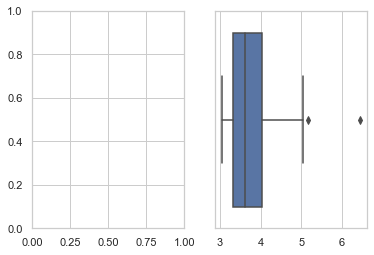

In [21]:
sample_df = df.sample(n=20, axis='columns')
sample_df['class'] = df['class']
# sns.boxplot(x=sample_df[sample_df.columns[0]][sample_df['class']=='M'])#, hue='class', data=sample_df)
# sns.boxplot(x=sample_df[sample_df.columns[0]][sample_df['class']=='H'])#, hue='class', data=sample_df)
fig, axs = plt.subplots(1,2)
# for i in range(2):
axs[0,0] = sns.boxplot(x=sample_df[sample_df.columns[0]][sample_df['class']=='M'].values)
    # axs[i,0].set_title(f'Gene {sample_df.columns[i]}, Sick Population')
axs[1,1] = sns.boxplot(x=sample_df[sample_df.columns[i]][sample_df['class']=='H'].values)
    # axs[i,1].set_title(f'Gene {sample_df.columns[i]}, Healthy Population')
fig.tight_layout()

# for ax in axs.flat:
#     ax.set(xlabel='x-label', ylabel='y-label')
# for ax in axs.flat:
#     ax.label_outer()
# sns.boxplot(y=sample_df['M'].iloc[0], x='M')

### WRS for differential expression(DE)

1) Consider some gene, g. Under the null model (which assumes that for g there is no M vs H DE), what is the expected sum of ranks of g’s expression levels measured for samples labeled M?

In [22]:
n = len(df)
b = len(df[df['class'] == 'M'])
mu = b * ((n + 1) / 2)
print(f"The expected rank sum is {mu}")

The expected rank sum is 2450.0


2) Denote this sum of ranks by RS(g). What is the maximal value, c, that RS(g) can take?

In [23]:
c = sum([i for i in range(b +1, n +1)])
print(f"The maximal value will be achieved if all of the top ranks would be from the M population. In this case {c}")

The maximal value will be achieved if all of the top ranks would be from the M population. In this case 3725


3) Under the null model, what is the probability of RS(g) = c? (Provide a formula for this and explain it)

In [24]:
num_combs = math.comb(n, b)
p_c = 1 / num_combs
print(f"There is only one permutation in which the the rank sum equals the maximal rank sum, hence the probability is 1/all possible probabilities: {p_c:.3}")

There is only one permutation in which the the rank sum equals the maximal rank sum, hence the probability is 1/all possible probabilities: 1.98e-29


4) Under the null model,what is the probability of RS(g)=c-1? what is the probability of RS(g) = c-2?
(Provide formulas and explain them)


To calculate $RS(g) = c-1$, we'll use the CLT and calculate the p value of $RS(g) \le c-1$ and deduct the p value of $RS(g) = c$

In [25]:
sig = math.sqrt(b*(n-b)*(n+1)/12)
z = (c-1 - mu) / sig
p_c_minus_1 = st.norm.sf(abs(z))*2 #Two sided - is it right?
print(f"P(RS(g) = c-1) = {p_c_minus_1 - p_c:.3}")

P(RS(g) = c-1) = 4.83e-19


We'll do the same for $RS(g) = c-2$:

In [26]:
z = (c-2 - mu) / sig
p_c_minus_2 = st.norm.sf(abs(z))*2
print(f"P(RS(g) = c-1) = {p_c_minus_2 - p_c_minus_1 - p_c:.3}")

P(RS(g) = c-1) = 3.15e-20


5) Draw a histogram of the values of RS(g) in the dataset. Here g ranges over all genes in the data (after the clean-up). Compute the IQR for this distribution and present it on the plot with the histogram.

In [27]:
rss = [st.ranksums(df[df.columns[i]][df['class']== 'M'], df[df.columns[i]][df['class']== 'H'])[0] * sig + mu for i in range(num_genes)]
rss
# TODO: There are non round values here. WTF?

[2304.0,
 2604.0,
 2963.0,
 2540.0,
 2598.0,
 2308.0,
 2010.0,
 2691.0,
 2697.0,
 1924.0,
 2569.0,
 2602.0,
 2616.0,
 2614.0,
 2263.0,
 2491.5,
 2427.0,
 2366.0,
 2280.0,
 2488.0,
 2595.5,
 2705.0,
 2423.5,
 2478.0,
 2499.0,
 2786.0,
 2086.0,
 2478.0,
 2697.0,
 2200.5,
 2632.0,
 2061.0,
 1966.0,
 2267.0,
 2694.0,
 2710.0,
 2394.0,
 2755.0,
 2312.0,
 2255.0,
 2085.0,
 2532.5,
 2227.0,
 2299.0,
 2296.0,
 2442.0,
 2476.5,
 2112.0,
 2500.0,
 2246.5,
 2465.0,
 2121.0,
 1899.0,
 2264.5,
 2597.0,
 2155.0,
 2159.0,
 2421.5,
 2170.0,
 2337.0,
 2562.0,
 2194.0,
 2883.0,
 2262.0,
 2561.0,
 2021.0,
 3060.0,
 2713.0,
 2640.0,
 2412.5,
 2145.0,
 2338.0,
 1960.0,
 2577.5,
 2701.0,
 2653.0,
 2928.0,
 2189.0,
 2293.0,
 2096.0,
 2566.5,
 2399.0,
 2476.0,
 2524.0,
 2659.0,
 2577.5,
 2483.0,
 2385.0,
 2335.0,
 2691.0,
 2588.0,
 2495.0,
 2856.0,
 2749.5,
 2580.0,
 2523.0,
 2419.5,
 2482.0,
 2432.5,
 2341.5,
 2398.0,
 2700.5,
 2742.0,
 2750.0,
 2745.0,
 2696.5,
 2490.0,
 2695.0,
 2468.0,
 2562.0,
 2513.0,
 

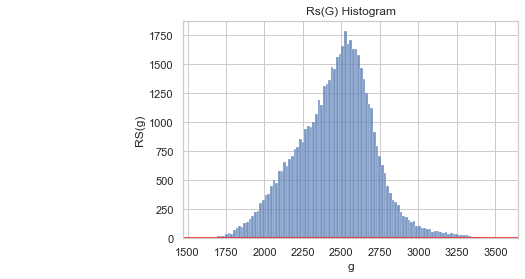

In [28]:
iqr = st.iqr(rss)
sf, ax = plt.subplots(1)
sns.histplot(rss)
ax.annotate("IQR", xy=(iqr, 0.25 + 0.02), color='black', fontsize=14)
ax.axhline(y=0.25, color='red')
plt.ylabel("RS(g)")
plt.xlabel("g")
plt.title("RS(g) Histogram".title())
plt.show()

### c. DifferentialExpression
The purpose is to determine the statistical significance of differential expression (DE) observed for each gene in H vs M. Evaluate the DE in both one-sided directions for every gene, using both Student t-test and WRS test.
Report the number of genes overexpressed in M vs H (M > H) at a p-value better (≤) than 0.07 and separately genes underexpressed in M vs H (M < H) at a p-value better than 0.07. For both directions use both a Student t-test and a WRS test.

In [31]:
# WRS
wrs_p_vals_m_over_h = [st.ranksums(df[df.columns[i]][df['class'] == 'M'], df[df.columns[i]][df['class'] == 'H'])[1] for i in range(num_genes)]
wrs_p_vals_m_over_h = [i for i in wrs_p_vals_m_over_h if i <= 0.07]
print(f"Under WRS test, there are {len(wrs_p_vals_m_over_h)} genes in which M > H at a p-value better than 0.07")
wrs_p_vals_h_over_m = [st.ranksums(df[df.columns[i]][df['class'] == 'H'], df[df.columns[i]][df['class'] == 'M'])[1] for i in range(num_genes)]
wrs_p_vals_h_over_m = [i for i in wrs_p_vals_h_over_m if i <= 0.07]
print(f"Under WRS test, there are {len(wrs_p_vals_m_over_h)} genes in which M < H at a p-value better than 0.07")
#  alternative='greater'

TypeError: ranksums() got an unexpected keyword argument 'alternative'

In [10]:
# Student T-Test
t_p_vals_h_over_m = [st.ttest_ind(df[df.columns[i]][df['class']== 'H'], df[df.columns[i]][df['class']== 'M'], alternative='greater')[1] for i in range(num_genes)]

(99, 54629)

In [11]:
num_genes

54675